### Stock futures and options

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'C:/Users/Maru/spb/ReserchAsia/OpenReserchAsia/Data_stock.dta'


In [3]:
data = pd.read_stata(url)

In [4]:
print(len(data))

608


In [5]:
exchanges = pd.Series(data['ExchangeName']).unique()
indicators = pd.Series(data['Indicator_Name']).unique()
regions = pd.Series(data['Region']).unique()
years = pd.Series(data['Year']).unique()

In [6]:
cs = ['Swiss', 'NASDAQ', 'Nasdaq', 'NYSE', 'Euronext', 'Spanish', 'Cboe', 'Europe',
      'Warsaw','Vienna','Bulgarian','Budapest','Bucharest','Malta',
     'Luxembourg','Italiana','Japan', 'London','Deutsche','LSE', 'TMX']
arr = []
for ex in exchanges:
    for c in cs:
        if c in ex:
            arr.append(ex)


In [7]:
mask = data['ExchangeName'].isin(arr)
data = data[~mask]

In [8]:
print(len(data))

416


In [9]:
index_nun = data[np.isnan(data['Value'])]['index']
mask2 = data['index'].isin(index_nun)
data = data[~mask2]

In [10]:
print(len(data))

274


In [11]:
data.head()

,index,Year,Region,Indicator_Name,ExchangeName,CurrencyName,Value,Nominal,DataType,YTD,__Change__YTD_,__Change__MTM_,__Change__YTY_,AggregationType
0,0,2020,Asia - Pacific,Single stock futures - Contracts traded,ASX Australian Securities Exchange,USD,2893184.0,1,NaN,2893184.0,NaN,NaN,-0.0720,Flow
1,1,2020,Asia - Pacific,Single stock options - Open interest,Hong Kong Exchanges and Clearing,USD,8860221.0,1,NaN,8860221.0,NaN,NaN,0.3375,Stock
2,2,2020,Asia - Pacific,Single stock futures - Open interest,Hong Kong Exchanges and Clearing,USD,22564.0,1,NaN,22564.0,NaN,NaN,-0.1639,Stock
9,9,2020,Asia - Pacific,Single stock options - Contracts traded,Hong Kong Exchanges and Clearing,USD,129601933.0,1,NaN,129601933.0,NaN,NaN,0.2179,Flow
11,11,2020,Asia - Pacific,Single stock futures - Open interest,Thailand Futures Exchange,USD,1783284.0,1,NaN,1783284.0,NaN,NaN,-0.3888,Stock


In [12]:
data['Total'] = data['Value']*data['Nominal']
cols = ['Year','Region','Indicator_Name','ExchangeName',
        'CurrencyName','Total']
data_prepare = data[cols]

In [13]:
big_exchanges = []

In [14]:
indicators

array(['Single stock futures - Contracts traded',
       'Single stock options - Open interest',
       'Single stock futures - Open interest',
       'Single stock options - Contracts traded'], dtype=object)

### CAPITALIZATION

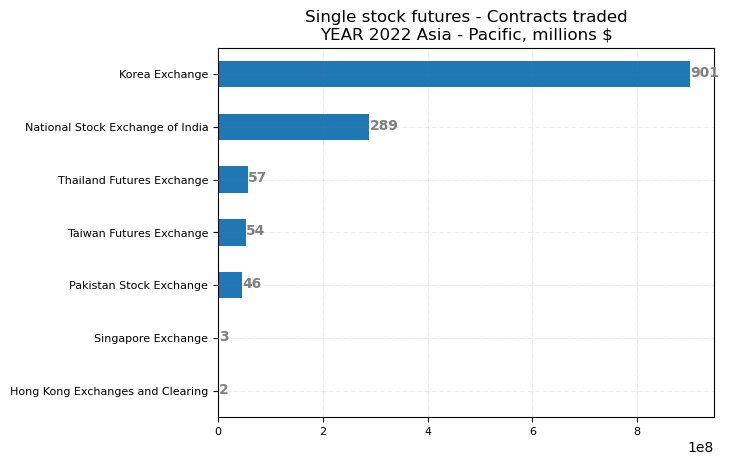

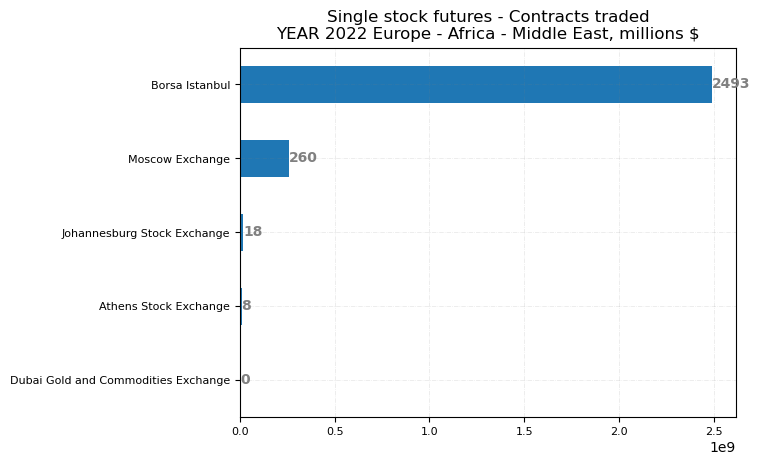

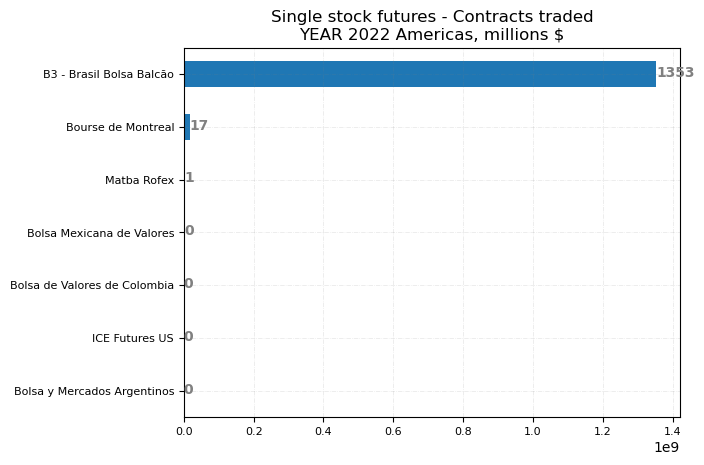

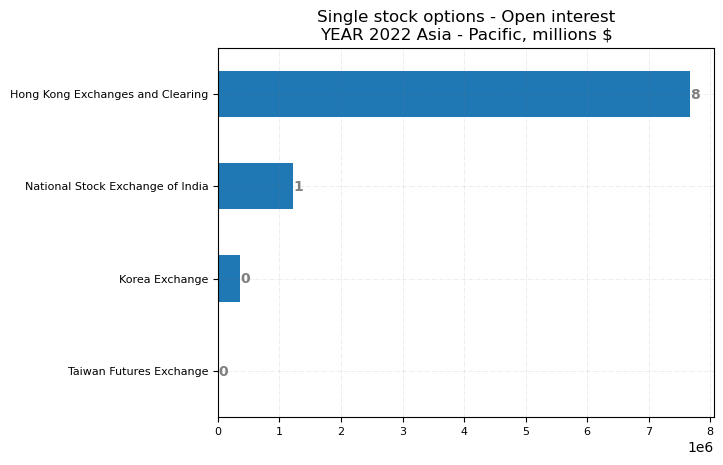

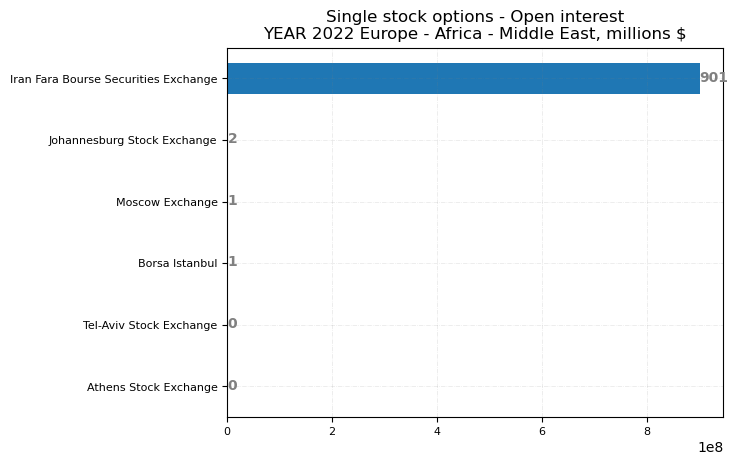

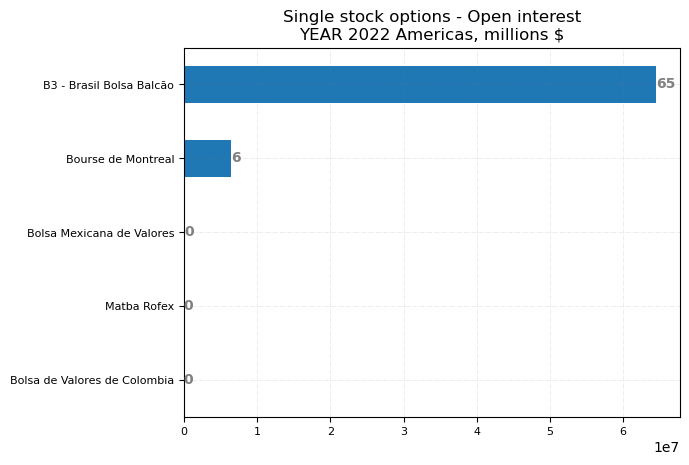

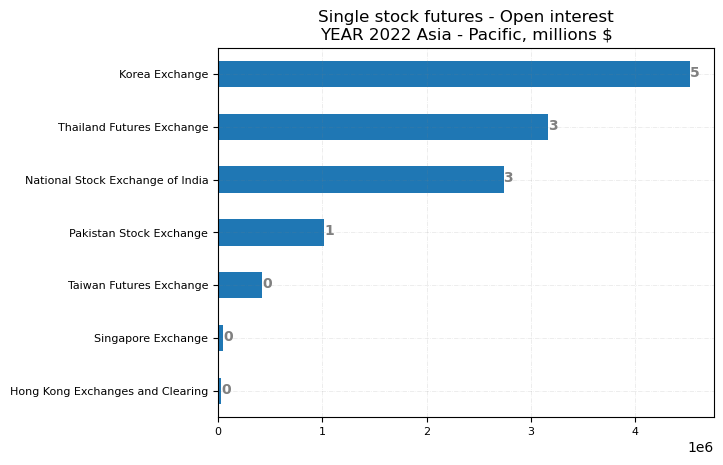

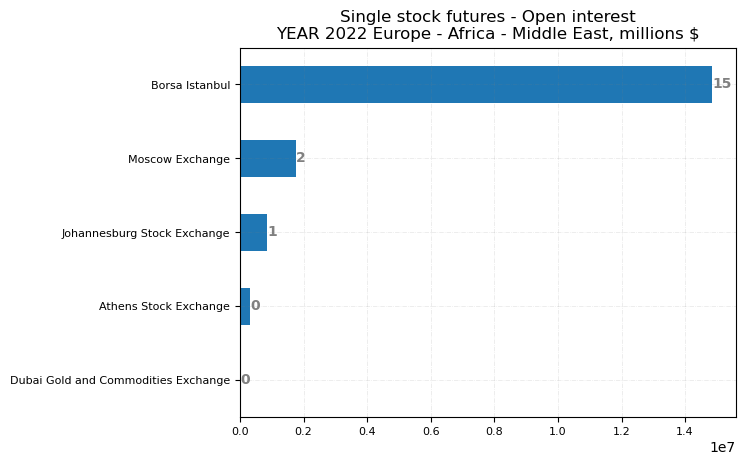

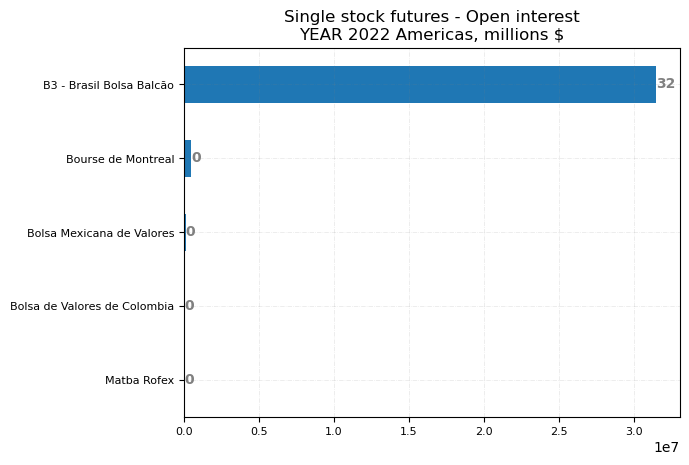

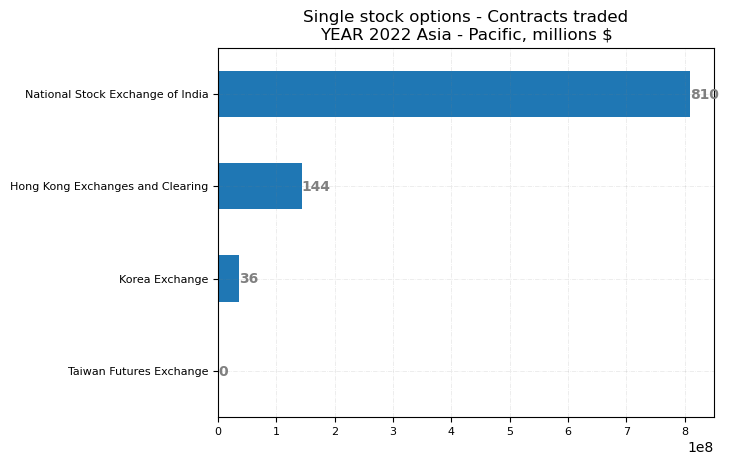

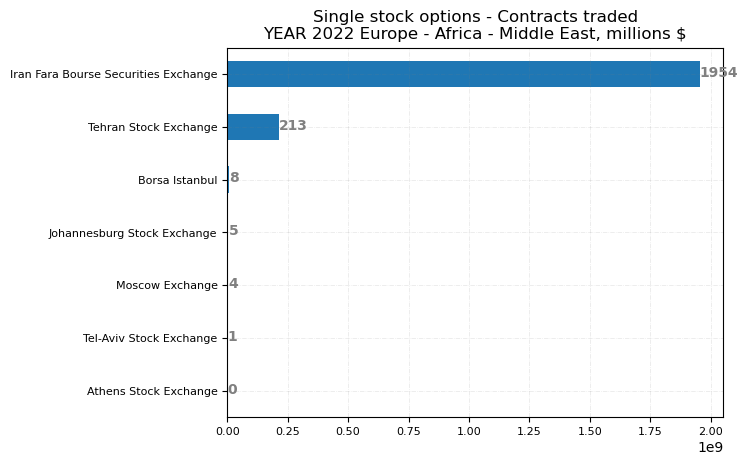

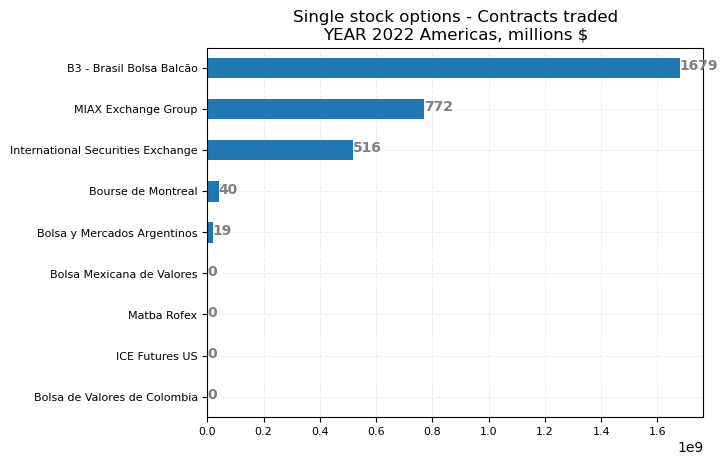

In [22]:
big_exchanges = []

for ind in indicators:
    #print('\033[1m' + ind +'\033[0m')
    y = 2022
    data_ind = data_prepare[data_prepare['Indicator_Name'] == ind]
    data_sort = data_ind.sort_values(by=['Year','Region', 'ExchangeName'], 
                                   ascending=True)
    for r in regions:
        #print('\033[1m' + 'REGION '+ r+'\033[0m')
        
        title = ind + '\n'+'YEAR '+ str(y) + ' ' + r + ', millions $'
        items = data_sort[(data_sort['Year'] == y)
                              &(data_sort['Region'] == r)].sort_values(by=['Total'],ascending=True)
        
        items_top = items[['ExchangeName','Total']].tail(10)
        #print(items.head())
        temp_exchanges = items[['ExchangeName']].tail(10).values.tolist() 
        #print(temp_exchanges)
        for t in temp_exchanges:            
            if (t[0] not in big_exchanges):
                big_exchanges.append(t[0])
                
        
        ax = items_top.plot(kind="barh", fontsize=8, x = 'ExchangeName', 
                            y='Total', title=title, legend=False)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.grid(visible = True, color ='grey',
                        linestyle ='-.', linewidth = 0.5,
                        alpha = 0.2)
        for i in ax.patches:
            plt.text(i.get_width()+0.2, i.get_y()+0.2,
                     str(round((i.get_width()/1000000))),
                     fontsize = 10, fontweight ='bold',
                     color ='grey')
        
        

In [16]:
big_exchanges.sort()
big_exchanges

['Athens Stock Exchange',
 'B3 - Brasil Bolsa Balcão',
 'Bolsa Mexicana de Valores',
 'Bolsa de Valores de Colombia',
 'Bolsa y Mercados Argentinos',
 'Borsa Istanbul',
 'Bourse de Montreal',
 'Dubai Gold and Commodities Exchange',
 'Hong Kong Exchanges and Clearing',
 'International Securities Exchange',
 'Iran Fara Bourse Securities Exchange',
 'Johannesburg Stock Exchange',
 'Korea Exchange',
 'MIAX Exchange Group',
 'Matba Rofex',
 'Moscow Exchange',
 'National Stock Exchange of India',
 'Pakistan Stock Exchange',
 'Taiwan Futures Exchange',
 'Tehran Stock Exchange',
 'Tel-Aviv Stock Exchange',
 'Thailand Futures Exchange']

In [17]:
data_bigex = data_prepare[data_prepare['ExchangeName'].isin(big_exchanges)]

In [18]:
indicators

array(['Single stock futures - Contracts traded',
       'Single stock options - Open interest',
       'Single stock futures - Open interest',
       'Single stock options - Contracts traded'], dtype=object)

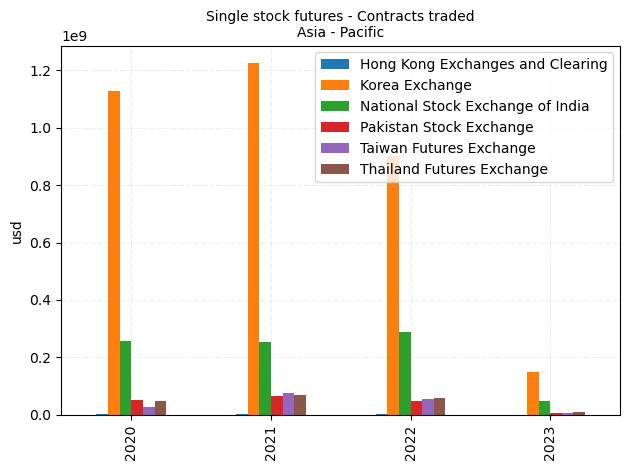

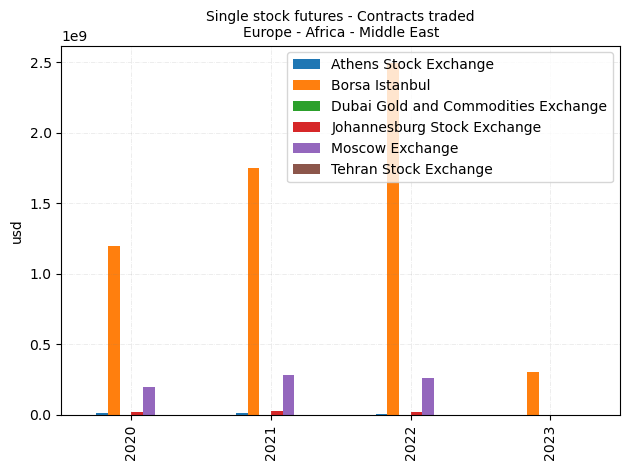

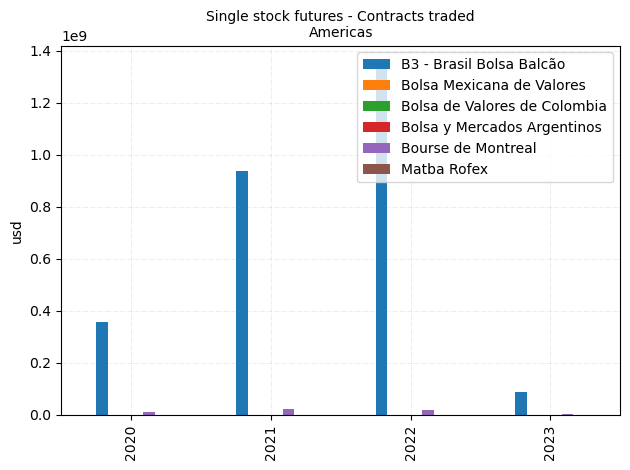

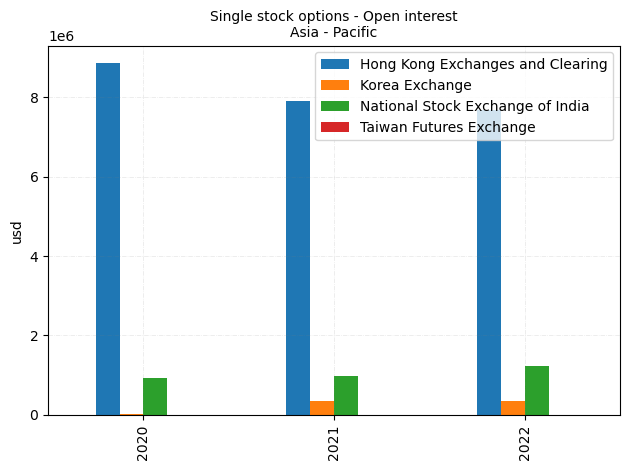

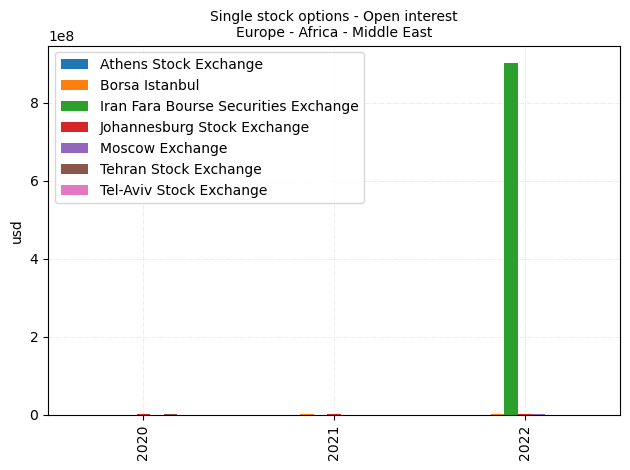

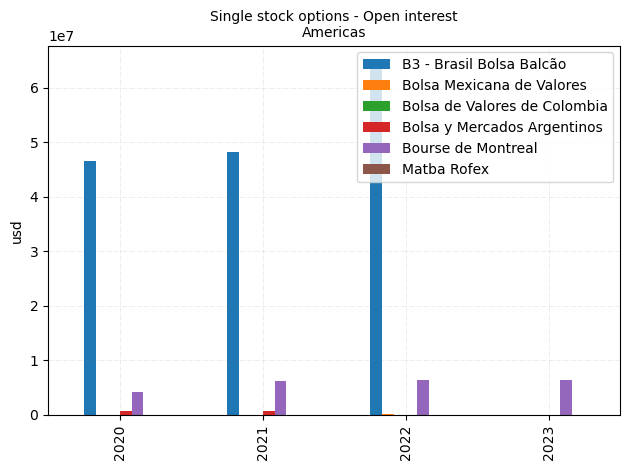

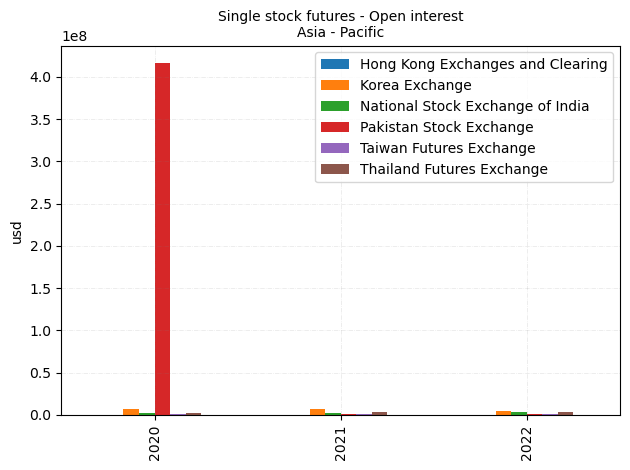

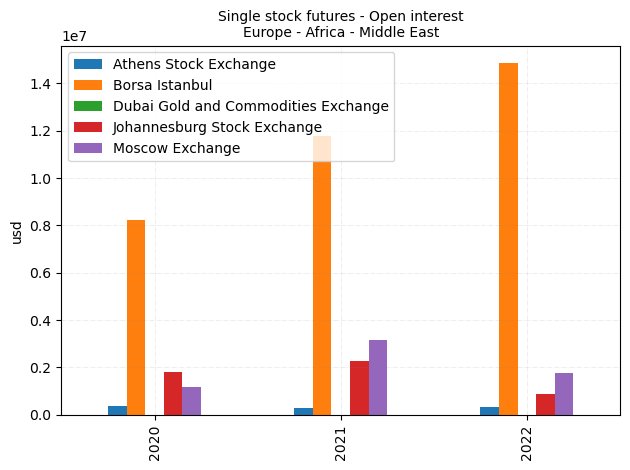

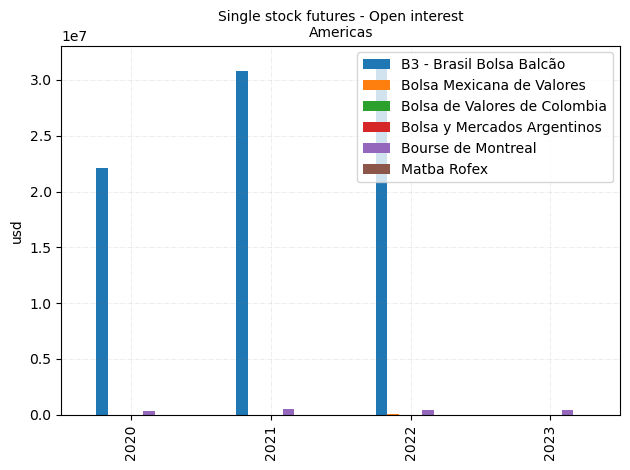

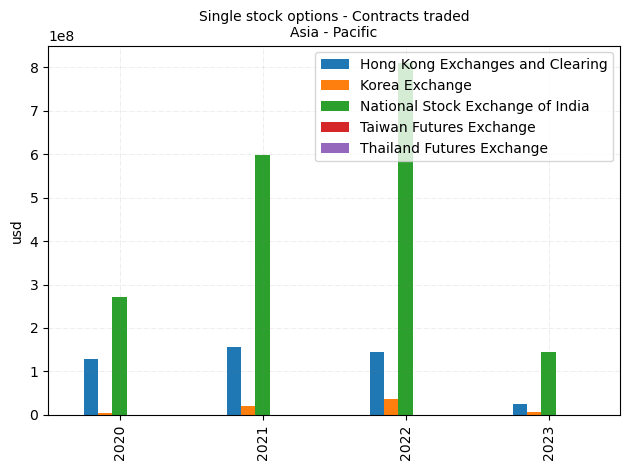

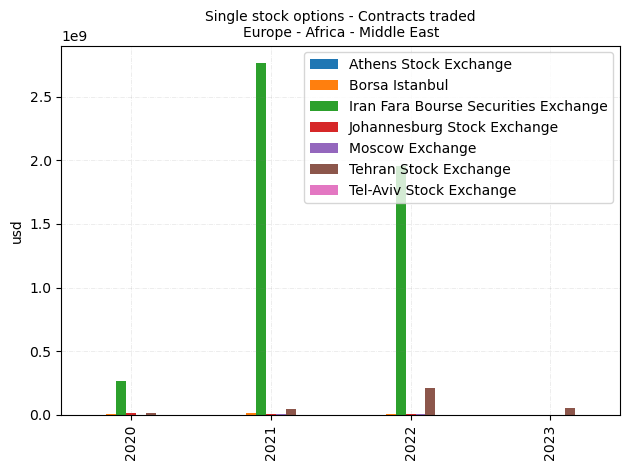

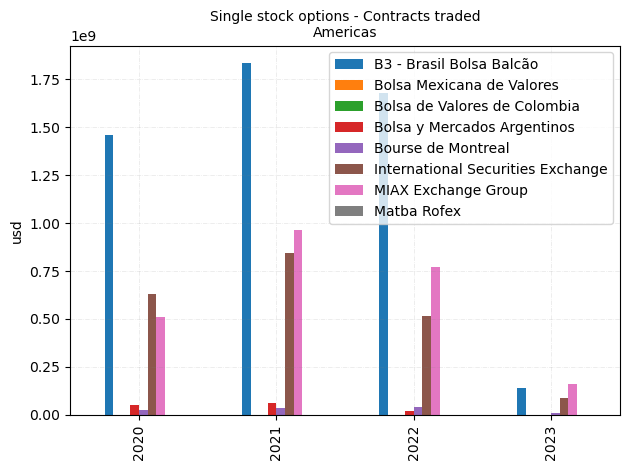

In [24]:
for ind in indicators:    
    
    for r in regions:    
        title = ind + '\n' + r
        data_ = data_bigex[(data_bigex['Indicator_Name'] == ind)
                          &(data_bigex['Region'] == r)]  
        
        pivot = pd.pivot_table(data_, values='Total', index='Year', 
                       columns='ExchangeName')
                
        ax = pivot.plot(kind="bar")
        
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.grid(visible = True, color ='grey',
                        linestyle ='-.', linewidth = 0.5,
                        alpha = 0.2)
        
        plt.legend(title='', fontsize= 10 )
        plt.xlabel('', fontsize=10 );
        plt.ylabel('usd', fontsize= 10 );
        plt.title(title, fontsize= 10 )

        ax.set_xlabel("")
        ax.set_ylabel("usd")
        plt.tick_params (axis='both', which='major', labelsize= 10 ) 
        plt.tight_layout()
        plt.show()
    
        
